# Neural Networks image recognition - MultiLayer Perceptron
Use both MLNN for the following problem.

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

# `np.random.normal`

## Parameters

### loc

Mean (“centre”) of the distribution.

### scale

Standard deviation (spread or “width”) of the distribution. Must be non-negative.

### size

Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.

# Neural Networks - Image Recognition 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend
from keras.utils import np_utils

In [2]:
import matplotlib.pyplot as  plt
%matplotlib inline

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [3]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

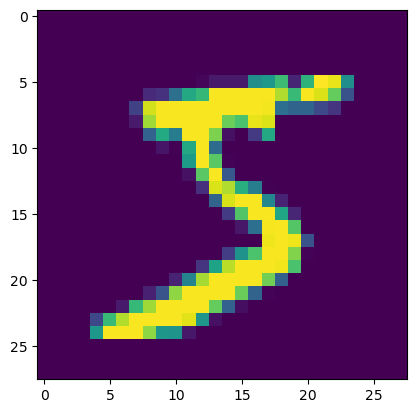

In [5]:
plt.imshow(x_train[0])

In [6]:
from numpy import random

x = random.normal(loc=1, scale=2, size=x_train.shape)
x

array([[[-2.70972124e-01,  5.13941261e+00,  3.30137384e-01, ...,
          2.47816735e+00,  1.87176698e+00, -4.68066066e-01],
        [ 2.40034368e+00,  3.66772158e+00, -2.40991144e+00, ...,
          4.69781568e+00,  1.74609606e+00, -1.76416211e+00],
        [ 1.84793024e+00,  6.86165833e-01,  1.52192628e+00, ...,
          1.85583931e+00, -1.02518963e+00,  2.75924489e+00],
        ...,
        [ 3.40829458e+00,  1.99450168e+00,  3.73585389e+00, ...,
          3.40912804e+00, -1.04026790e+00, -1.41305639e+00],
        [-2.34194905e+00,  1.66938398e+00, -8.47634547e-01, ...,
          2.83815127e+00, -6.22977900e+00, -1.95284282e+00],
        [ 4.84803649e+00, -1.31814245e+00, -3.45057852e-01, ...,
         -6.85164028e-01,  2.24158974e+00,  2.23348333e+00]],

       [[ 2.57807834e+00,  2.29527438e+00,  2.87235212e-01, ...,
          1.09336769e+00,  2.93519540e+00,  2.01274333e+00],
        [ 5.35716096e+00,  4.49205302e+00,  5.44040271e-01, ...,
         -7.47648394e-01,  1.22725143e

In [7]:
x_train + x

array([[[-2.70972124e-01,  5.13941261e+00,  3.30137384e-01, ...,
          2.47816735e+00,  1.87176698e+00, -4.68066066e-01],
        [ 2.40034368e+00,  3.66772158e+00, -2.40991144e+00, ...,
          4.69781568e+00,  1.74609606e+00, -1.76416211e+00],
        [ 1.84793024e+00,  6.86165833e-01,  1.52192628e+00, ...,
          1.85583931e+00, -1.02518963e+00,  2.75924489e+00],
        ...,
        [ 3.40829458e+00,  1.99450168e+00,  3.73585389e+00, ...,
          3.40912804e+00, -1.04026790e+00, -1.41305639e+00],
        [-2.34194905e+00,  1.66938398e+00, -8.47634547e-01, ...,
          2.83815127e+00, -6.22977900e+00, -1.95284282e+00],
        [ 4.84803649e+00, -1.31814245e+00, -3.45057852e-01, ...,
         -6.85164028e-01,  2.24158974e+00,  2.23348333e+00]],

       [[ 2.57807834e+00,  2.29527438e+00,  2.87235212e-01, ...,
          1.09336769e+00,  2.93519540e+00,  2.01274333e+00],
        [ 5.35716096e+00,  4.49205302e+00,  5.44040271e-01, ...,
         -7.47648394e-01,  1.22725143e

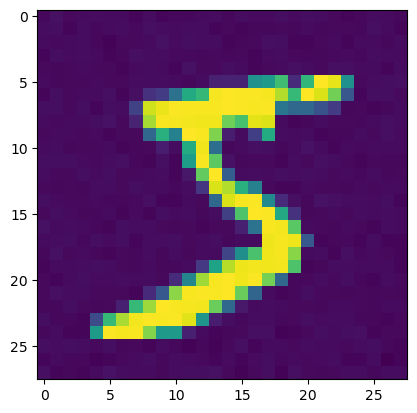

In [8]:
plt.imshow(x_train[0]+x[0])

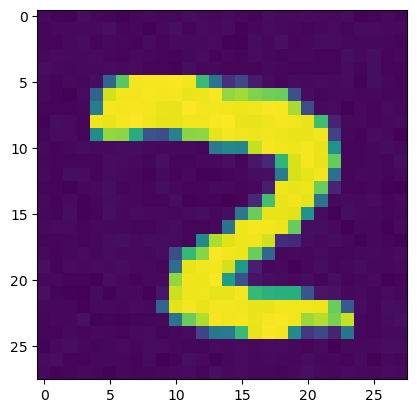

In [9]:
plt.imshow(x_train[28]+x[28])

In [10]:
#reshape the data without noise
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [11]:
batch_size = 128
num_classes = 10
epochs = 20
scores = []

In [12]:
# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

y_train, y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [13]:
# define the model and evaluate without noise
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2023-04-10 00:36:49.067569: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


2023-04-10 00:36:49.719696: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2447 - accuracy: 0.9238 - val_loss: 0.1206 - val_accuracy: 0.9639
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1039 - accuracy: 0.9685 - val_loss: 0.1000 - val_accuracy: 0.9696
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0731 - accuracy: 0.9774 - val_loss: 0.0712 - val_accuracy: 0.9775
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0598 - accuracy: 0.9814 - val_loss: 0.0707 - val_accuracy: 0.9816
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0508 - accuracy: 0.9847 - val_loss: 0.0687 - val_accuracy: 0.9811
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0444 - accuracy: 0.9872 - val_loss: 0.0850 - val_accuracy: 0.9787
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0390 - accuracy: 0.9886 - val_loss: 0.0771 - val_accuracy: 0.9838
Epoch 

In [14]:
# define the model and evaluate without noise and different epochs
epochs = [10, 20, 40, 80, 120]

for epoch in epochs:
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epoch,
                        verbose=1,
                        validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    scores.append(score)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2477 - accuracy: 0.9233 - val_loss: 0.

469/469 [==============================] - 3s 6ms/step - loss: 0.0450 - accuracy: 0.9862 - val_loss: 0.0723 - val_accuracy: 0.9808
Epoch 7/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0377 - accuracy: 0.9886 - val_loss: 0.0809 - val_accuracy: 0.9814
Epoch 8/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0345 - accuracy: 0.9894 - val_loss: 0.0805 - val_accuracy: 0.9837
Epoch 9/40
469/469 [==============================] - 3s 5ms/step - loss: 0.0321 - accuracy: 0.9905 - val_loss: 0.0764 - val_accuracy: 0.9843
Epoch 10/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0284 - accuracy: 0.9910 - val_loss: 0.1047 - val_accuracy: 0.9803
Epoch 11/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0266 - accuracy: 0.9923 - val_loss: 0.1035 - val_accuracy: 0.9832
Epoch 12/40
469/469 [==============================] - 3s 5ms/step - loss: 0.0261 - accuracy: 0.9926 - val_loss: 0.1131 - val_accuracy: 0.9820
Epoch 13/40
46

Epoch 16/80
469/469 [==============================] - 3s 6ms/step - loss: 0.0186 - accuracy: 0.9947 - val_loss: 0.1237 - val_accuracy: 0.9831
Epoch 17/80
469/469 [==============================] - 3s 5ms/step - loss: 0.0195 - accuracy: 0.9948 - val_loss: 0.1176 - val_accuracy: 0.9820
Epoch 18/80
469/469 [==============================] - 3s 5ms/step - loss: 0.0203 - accuracy: 0.9944 - val_loss: 0.1085 - val_accuracy: 0.9846
Epoch 19/80
469/469 [==============================] - 3s 5ms/step - loss: 0.0177 - accuracy: 0.9954 - val_loss: 0.1293 - val_accuracy: 0.9811
Epoch 20/80
469/469 [==============================] - 3s 6ms/step - loss: 0.0184 - accuracy: 0.9954 - val_loss: 0.1494 - val_accuracy: 0.9824
Epoch 21/80
469/469 [==============================] - 3s 5ms/step - loss: 0.0147 - accuracy: 0.9959 - val_loss: 0.1414 - val_accuracy: 0.9827
Epoch 22/80
469/469 [==============================] - 3s 5ms/step - loss: 0.0165 - accuracy: 0.9957 - val_loss: 0.1225 - val_accuracy: 0.9841

469/469 [==============================] - 3s 6ms/step - loss: 0.0094 - accuracy: 0.9982 - val_loss: 0.2537 - val_accuracy: 0.9835
Epoch 74/80
469/469 [==============================] - 3s 6ms/step - loss: 0.0098 - accuracy: 0.9981 - val_loss: 0.2727 - val_accuracy: 0.9835
Epoch 75/80
469/469 [==============================] - 3s 6ms/step - loss: 0.0111 - accuracy: 0.9979 - val_loss: 0.2668 - val_accuracy: 0.9834
Epoch 76/80
469/469 [==============================] - 3s 6ms/step - loss: 0.0102 - accuracy: 0.9985 - val_loss: 0.2841 - val_accuracy: 0.9830
Epoch 77/80
469/469 [==============================] - 3s 6ms/step - loss: 0.0094 - accuracy: 0.9980 - val_loss: 0.2568 - val_accuracy: 0.9838
Epoch 78/80
469/469 [==============================] - 3s 6ms/step - loss: 0.0112 - accuracy: 0.9983 - val_loss: 0.2311 - val_accuracy: 0.9852
Epoch 79/80
469/469 [==============================] - 3s 6ms/step - loss: 0.0099 - accuracy: 0.9984 - val_loss: 0.2793 - val_accuracy: 0.9835
Epoch 80/80

469/469 [==============================] - 3s 6ms/step - loss: 0.0117 - accuracy: 0.9975 - val_loss: 0.2009 - val_accuracy: 0.9833
Epoch 43/120
469/469 [==============================] - 3s 6ms/step - loss: 0.0150 - accuracy: 0.9970 - val_loss: 0.1946 - val_accuracy: 0.9838
Epoch 44/120
469/469 [==============================] - 3s 6ms/step - loss: 0.0146 - accuracy: 0.9971 - val_loss: 0.2149 - val_accuracy: 0.9838
Epoch 45/120
469/469 [==============================] - 3s 6ms/step - loss: 0.0105 - accuracy: 0.9976 - val_loss: 0.1911 - val_accuracy: 0.9828
Epoch 46/120
469/469 [==============================] - 3s 6ms/step - loss: 0.0139 - accuracy: 0.9973 - val_loss: 0.2177 - val_accuracy: 0.9823
Epoch 47/120
469/469 [==============================] - 3s 6ms/step - loss: 0.0115 - accuracy: 0.9977 - val_loss: 0.2044 - val_accuracy: 0.9845
Epoch 48/120
469/469 [==============================] - 3s 6ms/step - loss: 0.0122 - accuracy: 0.9975 - val_loss: 0.1895 - val_accuracy: 0.9827
Epoch

Epoch 99/120
469/469 [==============================] - 3s 6ms/step - loss: 0.0101 - accuracy: 0.9984 - val_loss: 0.3197 - val_accuracy: 0.9834
Epoch 100/120
469/469 [==============================] - 3s 6ms/step - loss: 0.0129 - accuracy: 0.9980 - val_loss: 0.2951 - val_accuracy: 0.9829
Epoch 101/120
469/469 [==============================] - 3s 6ms/step - loss: 0.0106 - accuracy: 0.9983 - val_loss: 0.2663 - val_accuracy: 0.9849
Epoch 102/120
469/469 [==============================] - 3s 6ms/step - loss: 0.0112 - accuracy: 0.9983 - val_loss: 0.2931 - val_accuracy: 0.9832
Epoch 103/120
469/469 [==============================] - 3s 6ms/step - loss: 0.0095 - accuracy: 0.9987 - val_loss: 0.3114 - val_accuracy: 0.9839
Epoch 104/120
469/469 [==============================] - 3s 6ms/step - loss: 0.0087 - accuracy: 0.9986 - val_loss: 0.3320 - val_accuracy: 0.9834
Epoch 105/120
469/469 [==============================] - 2s 5ms/step - loss: 0.0097 - accuracy: 0.9984 - val_loss: 0.3330 - val_acc

In [15]:
scores

[[0.07930032908916473, 0.9825000166893005],
 [0.148671954870224, 0.9825999736785889],
 [0.17644493281841278, 0.9839000105857849],
 [0.23880162835121155, 0.98580002784729],
 [0.3239193856716156, 0.9848999977111816]]

In [ ]:
# add different noise scales
scales = [.1, .5, 1.0, 2.0, 4.0]

for epoch in epochs:
    
    # build model and evaluate
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    model.summary()
    
    model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

    for scale in scales:
        print(epoch)
        
        x = random.normal(loc=1, scale=scale, size=x_train.shape)
        x_train = x_train + x
        
        x = random.normal(loc=1, scale=scale, size=x_test.shape)
        x_test = x_test + x
        
        history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epoch,
                    verbose=1,
                    validation_data=(x_test, y_test))
        
        score = model.evaluate(x_test, y_test, verbose=0)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])
        
        scores.append(score)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
10
Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 1.3363 - accuracy: 0.5509 - val_loss: